# k-mers baselines

In [1]:
# Retina quality plots
%config InlineBackend.figure_format = 'retina'

## Load data

In [2]:
import pandas as pd

X_train = pd.read_parquet('../../data/features_data/kmers/neg_subs/X_train.parquet')

X_train.info()
X_train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99004 entries, 5573770 to 2579830
Columns: 8000 entries, AAA to YYY
dtypes: uint16(8000)
memory usage: 1.5 GB


,AAA,AAC,AAD,AAE,AAF,AAG,AAH,AAI,AAK,AAL,...,YYM,YYN,YYP,YYQ,YYR,YYS,YYT,YYV,YYW,YYY
5573770,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5243680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2202726,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4758490,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1886152,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
y_train = pd.read_parquet('../../data/features_data/kmers/neg_subs/y_train.parquet')['HepB']

y_train.head()

5573770    False
5243680    False
2202726     True
4758490    False
1886152     True
Name: HepB, dtype: bool

In [4]:
X_valid_balanced = pd.read_parquet('../../data/features_data/kmers/X_valid_balanced.parquet')

X_valid_balanced.info()
X_valid_balanced.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23892 entries, 1479948 to 2604462
Columns: 8000 entries, AAA to YYY
dtypes: uint16(8000)
memory usage: 364.7 MB


,AAA,AAC,AAD,AAE,AAF,AAG,AAH,AAI,AAK,AAL,...,YYM,YYN,YYP,YYQ,YYR,YYS,YYT,YYV,YYW,YYY
1479948,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3833834,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1884337,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3610431,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2662499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y_valid_balanced = pd.read_parquet('../../data/features_data/kmers/y_valid_balanced.parquet')['HepB']

y_valid_balanced.head()

1479948    False
3833834     True
1884337     True
3610431     True
2662499     True
Name: HepB, dtype: bool

In [6]:
X_valid = pd.read_parquet('../../data/features_data/kmers/X_valid.parquet')

X_valid.info()
X_valid.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1773780 entries, 1 to 5696980
Columns: 8000 entries, AAA to YYY
dtypes: uint16(8000)
memory usage: 26.4 GB


,AAA,AAC,AAD,AAE,AAF,AAG,AAH,AAI,AAK,AAL,...,YYM,YYN,YYP,YYQ,YYR,YYS,YYT,YYV,YYW,YYY
Cluster_ID,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
y_valid = pd.read_parquet('../../data/features_data/kmers/y_valid.parquet')['HepB']

y_valid.head()

Cluster_ID
1     False
9     False
10    False
8     False
12    False
Name: HepB, dtype: bool

In [8]:
cluster_sizes = pd.read_parquet('../../data/combined/clustered/final/Galson_2015a.parquet').groupby('Cluster_ID').size()

cluster_sizes

Cluster_ID
0          27
1          20
2          18
3          11
4           8
           ..
5698099     1
5698100     1
5698101     1
5698102     1
5698103     1
Length: 5698104, dtype: int64

In [9]:
test_cluster_sizes = pd.read_parquet('../../data/combined/clustered/final/Galson_2016.parquet').groupby('Cluster_ID').size()

test_cluster_sizes

Cluster_ID
0          160
1           70
2           19
3           16
4           15
          ... 
1682427      1
1682428      1
1682429      1
1682430      1
1682431      1
Length: 1682432, dtype: int64

## Model selection

In [10]:
from bin.model_performance import model_selection

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef, recall_score, roc_curve

def fpr(y_true, y_pred, sample_weight=None):
    return roc_curve(y_true, y_pred, sample_weight=sample_weight)[0][1]

METRICS = [
    ('F1', f1_score),
    ('Accuracy', accuracy_score),
    ('MCC', matthews_corrcoef),
    ('Recall', recall_score),
    ('FPR', fpr)
]

RANDOM_STATE = 42

classifiers = [
    ('KNN', KNeighborsClassifier(n_jobs=-1)),
    ('ExtraTrees', ExtraTreesClassifier(random_state=RANDOM_STATE, n_jobs=-1))
]

best_perf, models_perf, trained_models = model_selection(classifiers, (X_train, X_valid_balanced, y_train, y_valid_balanced), METRICS, sample_weights=cluster_sizes)

Metric values:

Training KNN...
Predicting using KNN...
KNN - F1: 0.333, Accuracy: 0.649, MCC: 0.106, Recall: 0.398, FPR: 0.280, Non-weighted F1: 0.571, Non-weighted Accuracy: 0.632, Non-weighted MCC: 0.276, Non-weighted Recall: 0.490, Non-weighted FPR: 0.226

Training ExtraTrees...
Predicting using ExtraTrees...
ExtraTrees - F1: 0.369, Accuracy: 0.734, MCC: 0.202, Recall: 0.353, FPR: 0.158, Non-weighted F1: 0.594, Non-weighted Accuracy: 0.685, Non-weighted MCC: 0.415, Non-weighted Recall: 0.461, Non-weighted FPR: 0.090

------------------------------
------------------------------
Best performing model is ExtraTrees with metric value (F1) = 0.369


## Balanced validation evaluation

In [11]:
best_model = trained_models[best_perf[0]]
best_model

ExtraTreesClassifier(n_jobs=-1, random_state=42)

In [12]:
from bin.prediction import predict_in_batches
import numpy as np

pos_index = best_model.classes_.tolist().index(True)

y_pred_prob = np.array(predict_in_batches(best_model, X_valid_balanced.values, 5, probabilities=True))
y_pred_prob = y_pred_prob[:,pos_index]
y_pred_prob

array([0.  , 0.8 , 0.82, ..., 0.3 , 0.45, 0.06])

In [13]:
y_pred = np.array(predict_in_batches(best_model, X_valid_balanced.values, 5, probabilities=False))
y_pred

array([False,  True,  True, ..., False, False, False])

### Weighted

Metric values:

F1: 0.369
Accuracy: 0.734
MCC: 0.202
Recall: 0.353
FPR: 0.158




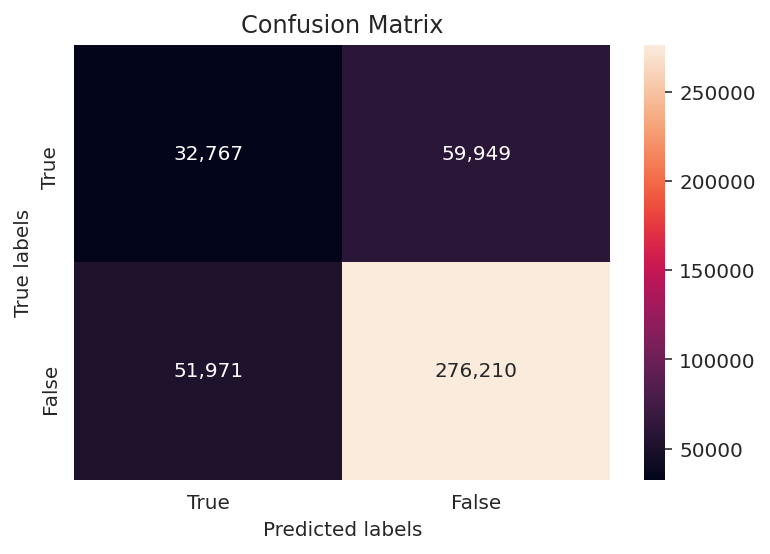

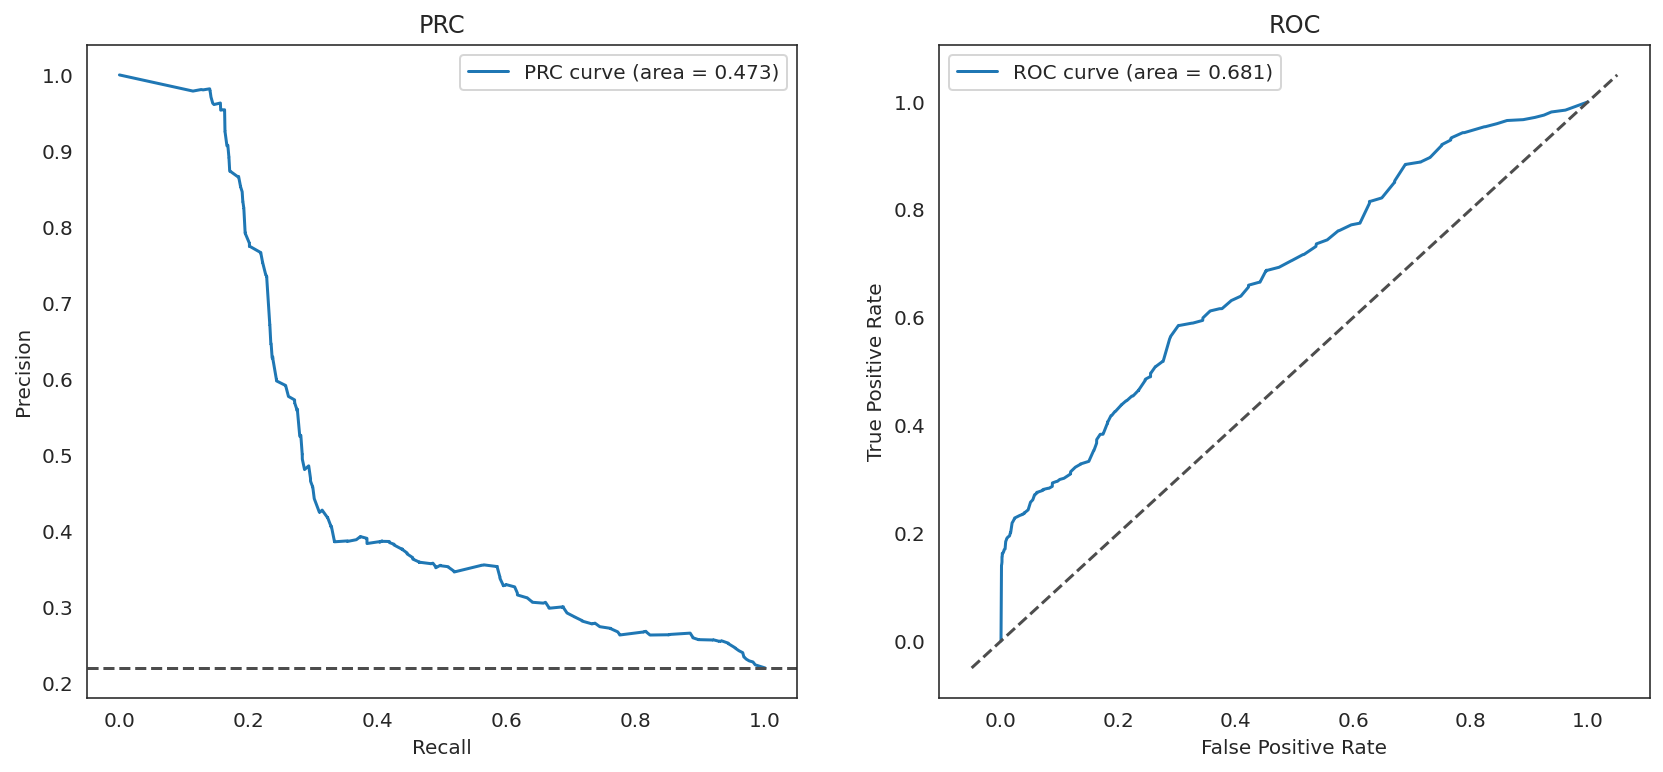

In [14]:
from bin.evaluation import evaluate_classifier

evaluate_classifier(y_valid_balanced, y_pred, y_pred_prob, METRICS, sample_weights=cluster_sizes.loc[y_valid_balanced.index])

### Non-weighted

Metric values:

F1: 0.594
Accuracy: 0.685
MCC: 0.415
Recall: 0.461
FPR: 0.090




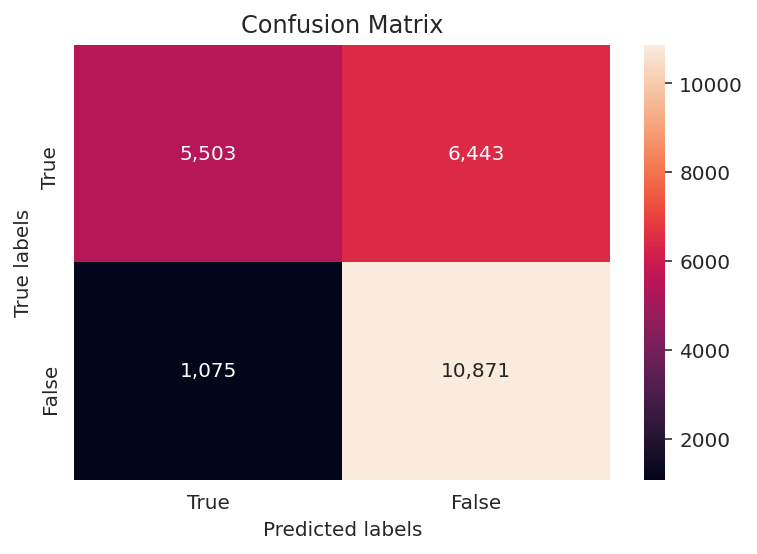

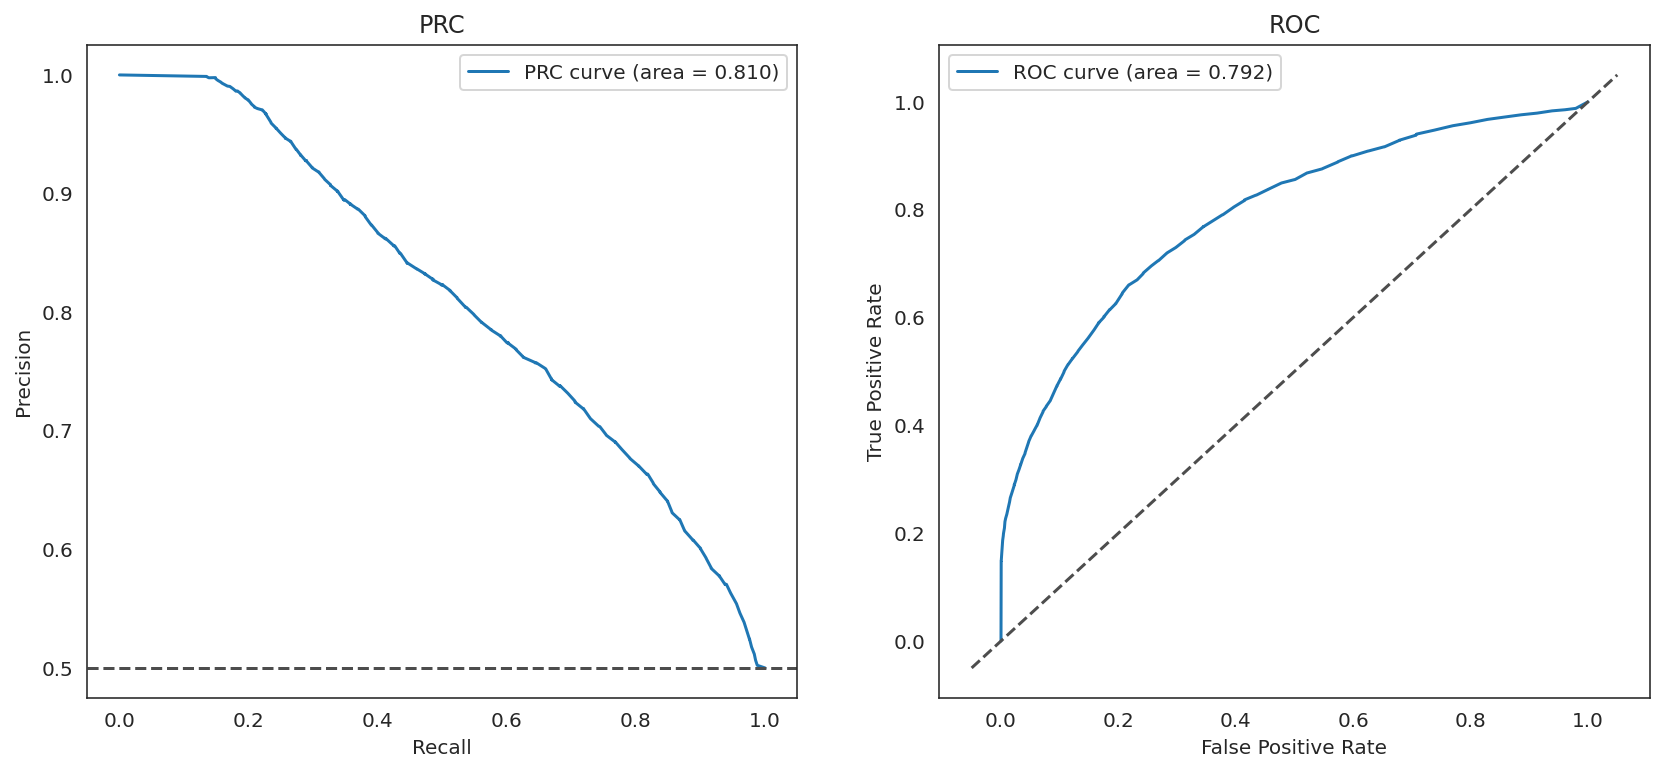

In [15]:
evaluate_classifier(y_valid_balanced, y_pred, y_pred_prob, METRICS)

## Full validation evaluation

In [16]:
y_pred_prob = np.array(predict_in_batches(best_model, X_valid.values, 15, probabilities=True, verbose=True))
y_pred_prob = y_pred_prob[:,pos_index]
y_pred_prob

Predicting targets for batch #0 of shape (118252, 8000)...
Predicting targets for batch #1 of shape (118252, 8000)...
Predicting targets for batch #2 of shape (118252, 8000)...
Predicting targets for batch #3 of shape (118252, 8000)...
Predicting targets for batch #4 of shape (118252, 8000)...
Predicting targets for batch #5 of shape (118252, 8000)...
Predicting targets for batch #6 of shape (118252, 8000)...
Predicting targets for batch #7 of shape (118252, 8000)...
Predicting targets for batch #8 of shape (118252, 8000)...
Predicting targets for batch #9 of shape (118252, 8000)...
Predicting targets for batch #10 of shape (118252, 8000)...
Predicting targets for batch #11 of shape (118252, 8000)...
Predicting targets for batch #12 of shape (118252, 8000)...
Predicting targets for batch #13 of shape (118252, 8000)...
Predicting targets for batch #14 of shape (118252, 8000)...


array([0.7  , 0.54 , 0.39 , ..., 0.2  , 0.66 , 0.445])

In [17]:
y_pred = np.array(predict_in_batches(best_model, X_valid.values, 15, probabilities=False, verbose=True))
y_pred

Predicting targets for batch #0 of shape (118252, 8000)...
Predicting targets for batch #1 of shape (118252, 8000)...
Predicting targets for batch #2 of shape (118252, 8000)...
Predicting targets for batch #3 of shape (118252, 8000)...
Predicting targets for batch #4 of shape (118252, 8000)...
Predicting targets for batch #5 of shape (118252, 8000)...
Predicting targets for batch #6 of shape (118252, 8000)...
Predicting targets for batch #7 of shape (118252, 8000)...
Predicting targets for batch #8 of shape (118252, 8000)...
Predicting targets for batch #9 of shape (118252, 8000)...
Predicting targets for batch #10 of shape (118252, 8000)...
Predicting targets for batch #11 of shape (118252, 8000)...
Predicting targets for batch #12 of shape (118252, 8000)...
Predicting targets for batch #13 of shape (118252, 8000)...
Predicting targets for batch #14 of shape (118252, 8000)...


array([ True,  True, False, ..., False,  True, False])

In [18]:
np.save('kmers_valid.npy', y_pred)

### Weighted

Metric values:

F1: 0.132
Accuracy: 0.896
MCC: 0.131
Recall: 0.353
FPR: 0.092




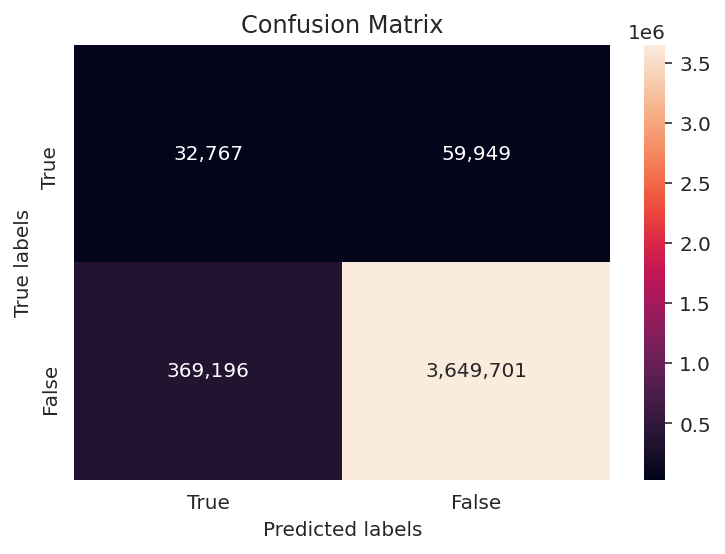

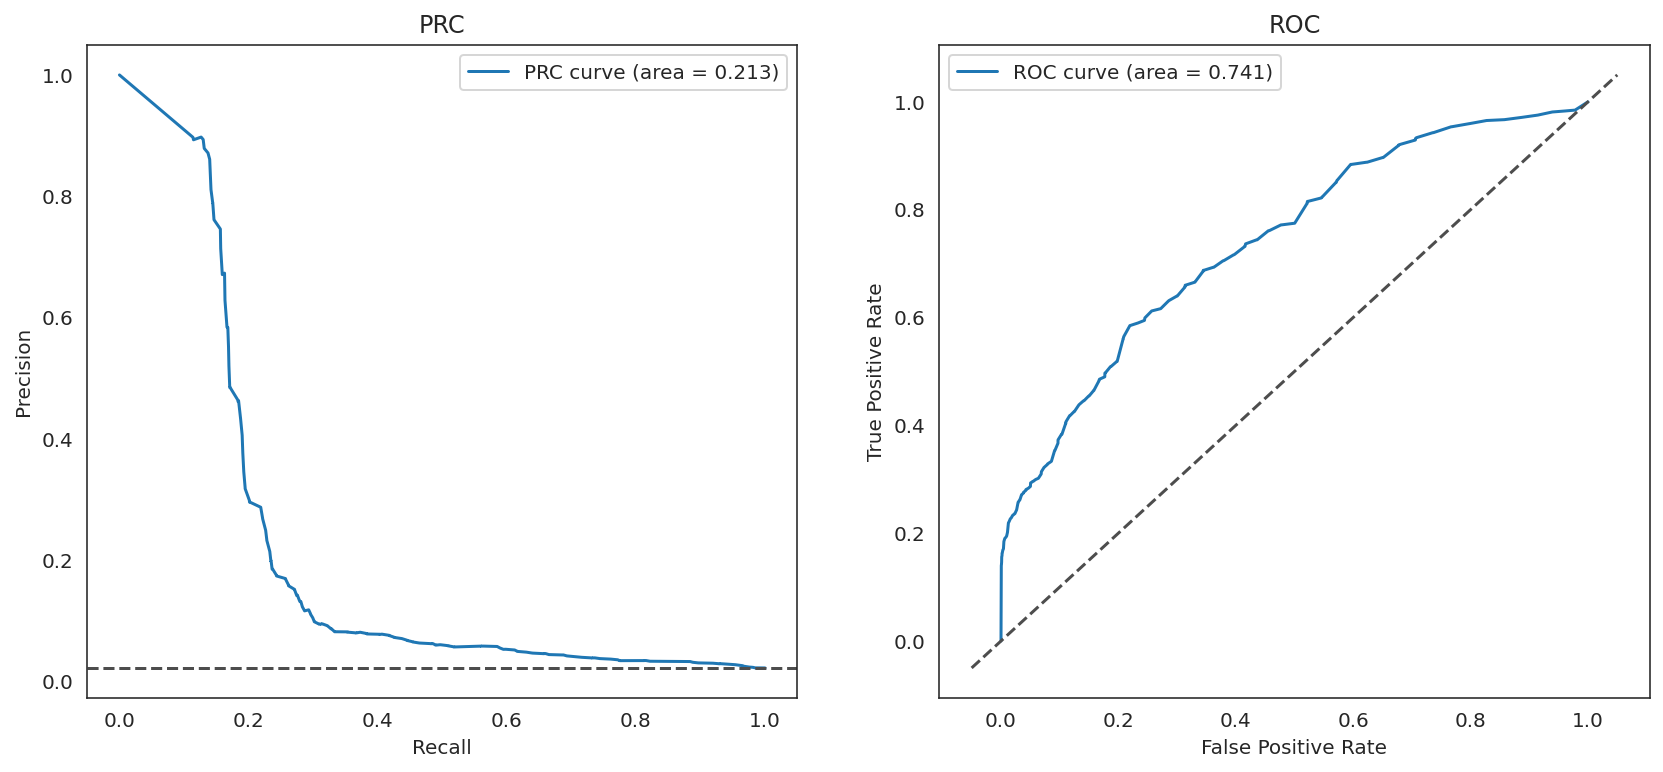

In [19]:
evaluate_classifier(y_valid, y_pred, y_pred_prob, METRICS, sample_weights=cluster_sizes.loc[y_valid.index])

### Non-weighted

Metric values:

F1: 0.075
Accuracy: 0.923
MCC: 0.119
Recall: 0.461
FPR: 0.074




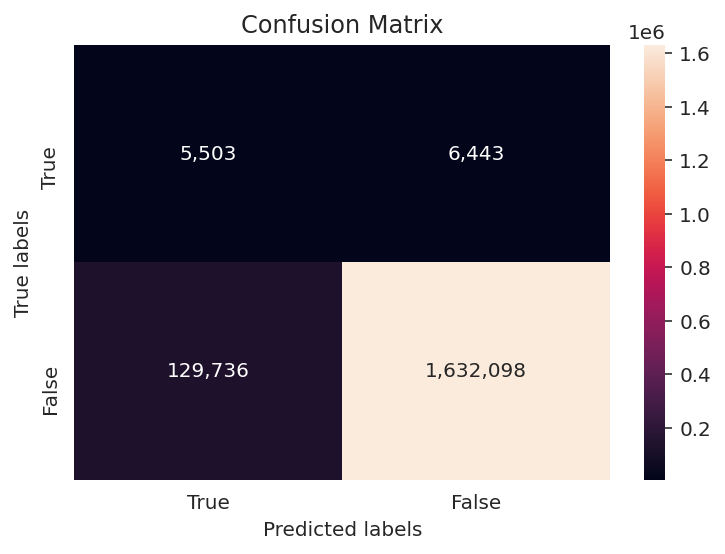

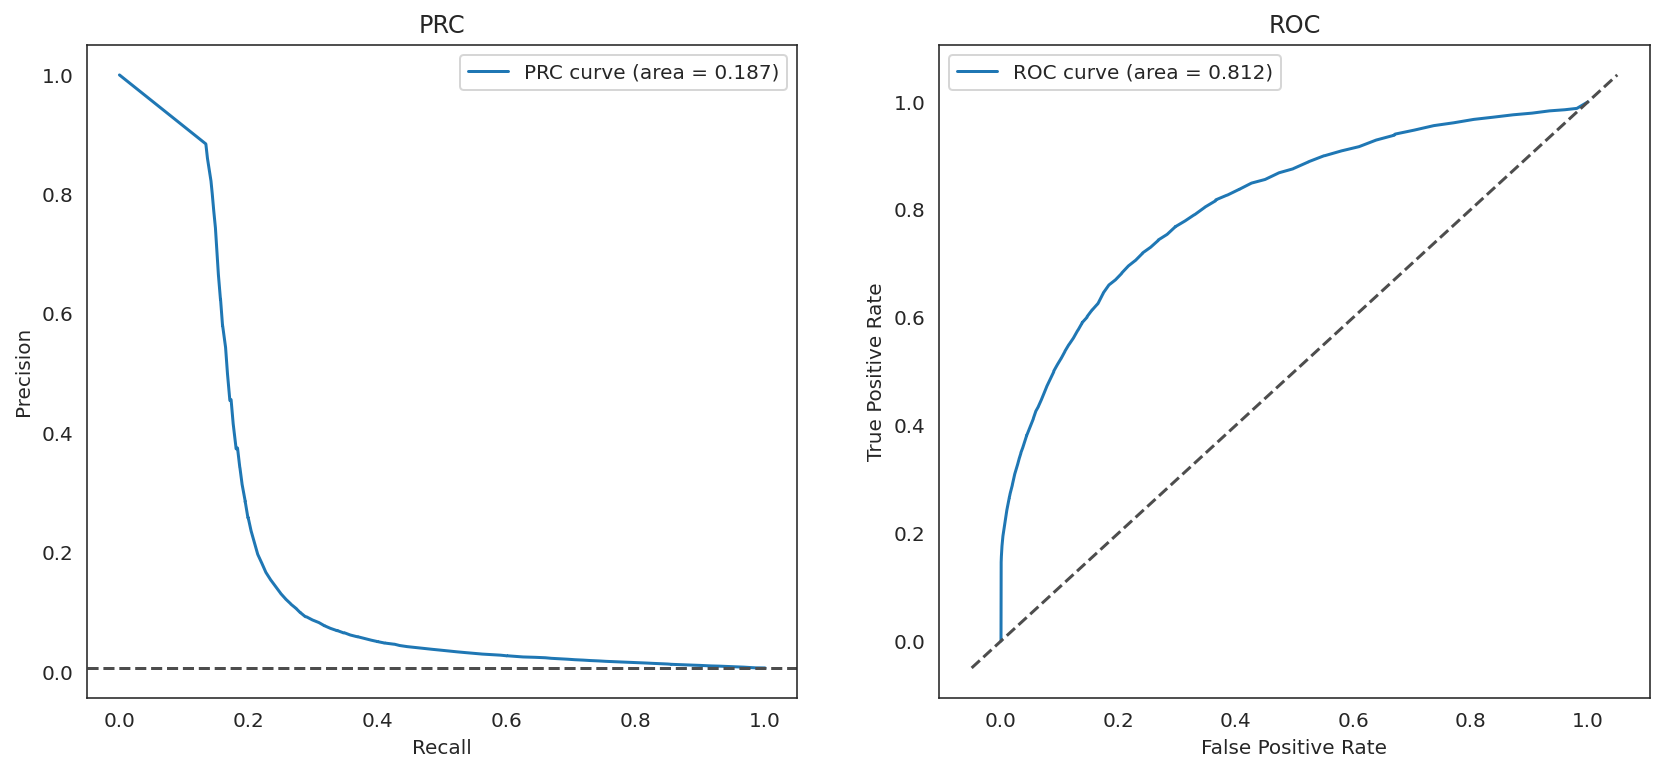

In [20]:
from bin.evaluation import evaluate_classifier

evaluate_classifier(y_valid, y_pred, y_pred_prob, METRICS)

## Re-train and save model on train + validation set

In [21]:
X_train_valid = pd.concat([X_train, X_valid_balanced])

X_train_valid.info()
X_train_valid.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122896 entries, 5573770 to 2604462
Columns: 8000 entries, AAA to YYY
dtypes: uint16(8000)
memory usage: 1.8 GB


,AAA,AAC,AAD,AAE,AAF,AAG,AAH,AAI,AAK,AAL,...,YYM,YYN,YYP,YYQ,YYR,YYS,YYT,YYV,YYW,YYY
5573770,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5243680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2202726,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4758490,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1886152,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
y_train_valid = pd.concat([y_train, y_valid_balanced])

y_train_valid.head()

5573770    False
5243680    False
2202726     True
4758490    False
1886152     True
Name: HepB, dtype: bool

In [23]:
best_model.fit(X_train_valid, y_train_valid)

ExtraTreesClassifier(n_jobs=-1, random_state=42)

In [24]:
from joblib import dump

dump(best_model, '../../models/baseline/et_kmers_full_g2015.joblib') 

['../../models/baseline/et_kmers_full_g2015.joblib']

## Test evaluation

In [25]:
import pandas as pd

BIN_THRESHOLDS = [0.5, 0.6, 0.7, 0.8, 0.9, 1]
BINNING_CRITERIONS = ['identity', 'sim']

# Format: {crit0: [bin0,bin1,...], crit1: [bin0,bin1,...]}
data_bins = {binning_crit: [pd.read_parquet(f'../../data/train_test_alignments/kmers_Galson_2016_pos_{int(threshold * 100)}_{binning_crit}.parquet') for threshold in BIN_THRESHOLDS] for binning_crit in BINNING_CRITERIONS}

In [26]:
pos_to_neg_bins = {
    crit: pd.read_parquet(f'../../data/train_test_alignments/Galson_2016_pos_to_neg_{crit}.parquet')
    for crit in BINNING_CRITERIONS
}

In [27]:
from joblib import load

best_model = load('../../models/baseline/et_kmers_full_g2015.joblib') 

### Positives + negatives

In [28]:
X_test = pd.read_parquet('../../data/features_data_g2016/kmers_cdr3/Galson_2016_single.parquet')

X_test.info()
X_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682432 entries, 0 to 1682431
Columns: 8000 entries, AAA to YYY
dtypes: uint16(8000)
memory usage: 25.1 GB


,AAA,AAC,AAD,AAE,AAF,AAG,AAH,AAI,AAK,AAL,...,YYM,YYN,YYP,YYQ,YYR,YYS,YYT,YYV,YYW,YYY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
y_test = pd.read_parquet('../../data/targets_data/clusters/Galson_2016.parquet')['HepB']

y_test.head()

Cluster_ID
0     True
1    False
2    False
3    False
4     True
Name: HepB, dtype: bool

In [30]:
from bin.prediction import predict_in_batches

test_preds = predict_in_batches(best_model, X_test, batches_cnt=50, verbose=True)

Predicting targets for batch #0 of shape (33649, 8000)...
Predicting targets for batch #1 of shape (33649, 8000)...
Predicting targets for batch #2 of shape (33649, 8000)...
Predicting targets for batch #3 of shape (33649, 8000)...
Predicting targets for batch #4 of shape (33649, 8000)...
Predicting targets for batch #5 of shape (33649, 8000)...
Predicting targets for batch #6 of shape (33649, 8000)...
Predicting targets for batch #7 of shape (33649, 8000)...
Predicting targets for batch #8 of shape (33649, 8000)...
Predicting targets for batch #9 of shape (33649, 8000)...
Predicting targets for batch #10 of shape (33649, 8000)...
Predicting targets for batch #11 of shape (33649, 8000)...
Predicting targets for batch #12 of shape (33649, 8000)...
Predicting targets for batch #13 of shape (33649, 8000)...
Predicting targets for batch #14 of shape (33649, 8000)...
Predicting targets for batch #15 of shape (33649, 8000)...
Predicting targets for batch #16 of shape (33649, 8000)...
Predict

In [31]:
test_preds_proba = predict_in_batches(best_model, X_test, probabilities=True, batches_cnt=50, verbose=True)

Predicting targets for batch #0 of shape (33649, 8000)...
Predicting targets for batch #1 of shape (33649, 8000)...
Predicting targets for batch #2 of shape (33649, 8000)...
Predicting targets for batch #3 of shape (33649, 8000)...
Predicting targets for batch #4 of shape (33649, 8000)...
Predicting targets for batch #5 of shape (33649, 8000)...
Predicting targets for batch #6 of shape (33649, 8000)...
Predicting targets for batch #7 of shape (33649, 8000)...
Predicting targets for batch #8 of shape (33649, 8000)...
Predicting targets for batch #9 of shape (33649, 8000)...
Predicting targets for batch #10 of shape (33649, 8000)...
Predicting targets for batch #11 of shape (33649, 8000)...
Predicting targets for batch #12 of shape (33649, 8000)...
Predicting targets for batch #13 of shape (33649, 8000)...
Predicting targets for batch #14 of shape (33649, 8000)...
Predicting targets for batch #15 of shape (33649, 8000)...
Predicting targets for batch #16 of shape (33649, 8000)...
Predict

In [32]:
pos_class_index = best_model.classes_.tolist().index(True)

test_preds_pos_proba = np.array(test_preds_proba)[:,pos_class_index]
test_preds_pos_proba

array([0.23, 0.22, 0.26, ..., 0.45, 0.51, 0.28])

#### Non-weighted

Metric values:

F1: 0.261
Accuracy: 0.761
MCC: 0.125
Recall: 0.309
FPR: 0.167




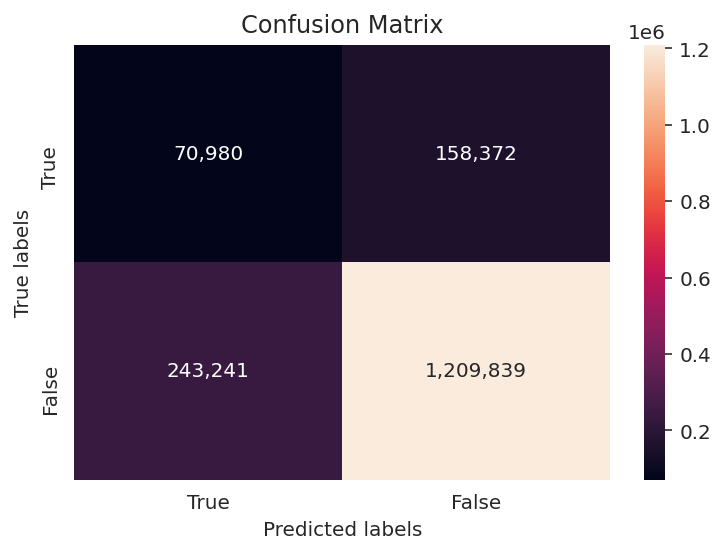

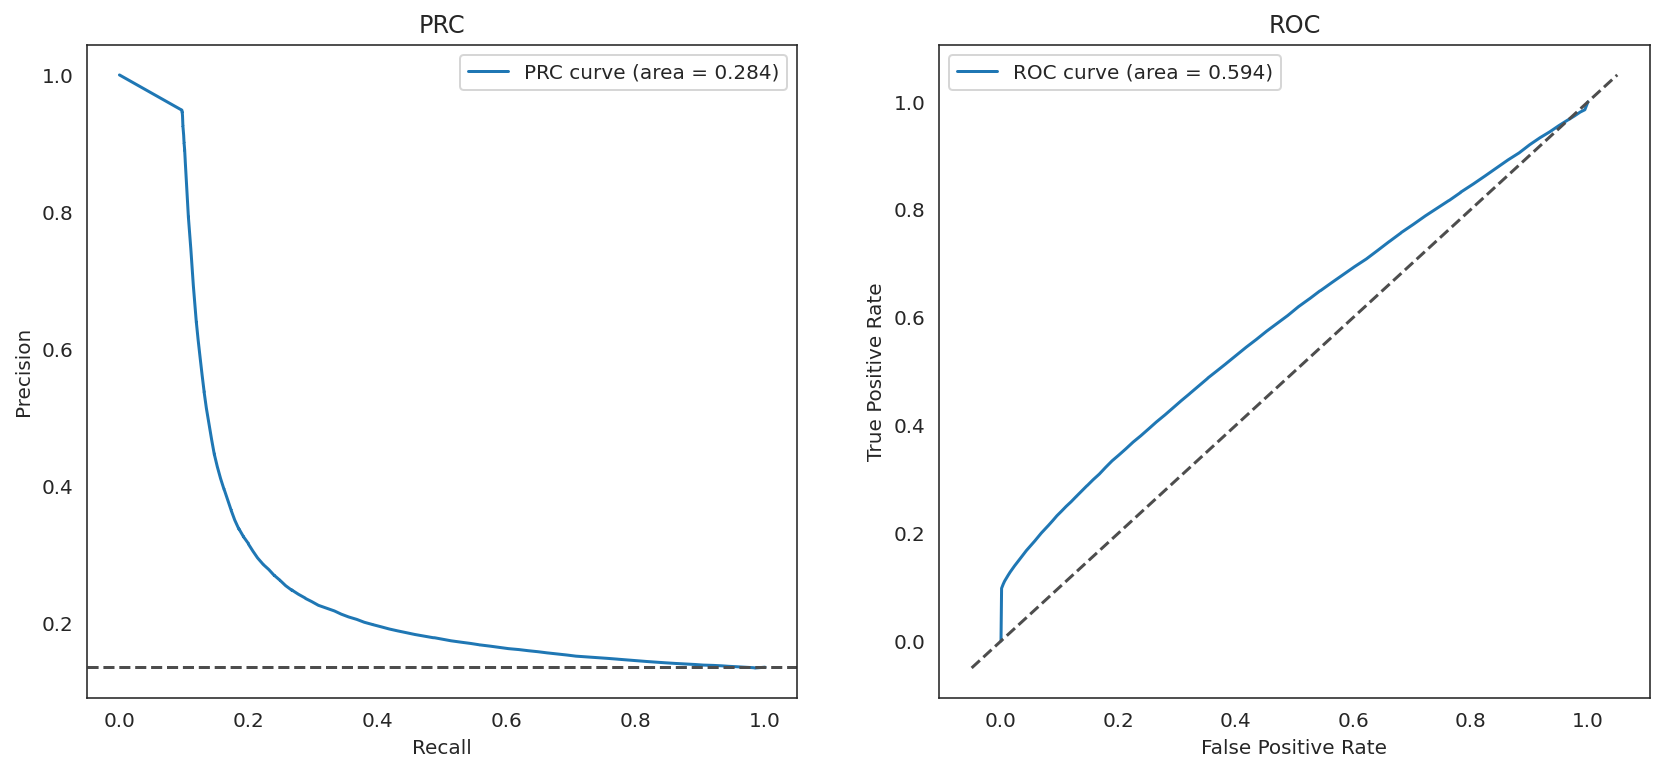

In [33]:
from bin.evaluation import evaluate_classifier

evaluate_classifier(y_test, test_preds, np.array(test_preds_proba)[:,1], METRICS)

#### Weighted

Metric values:

F1: 0.469
Accuracy: 0.705
MCC: 0.272
Recall: 0.421
FPR: 0.168




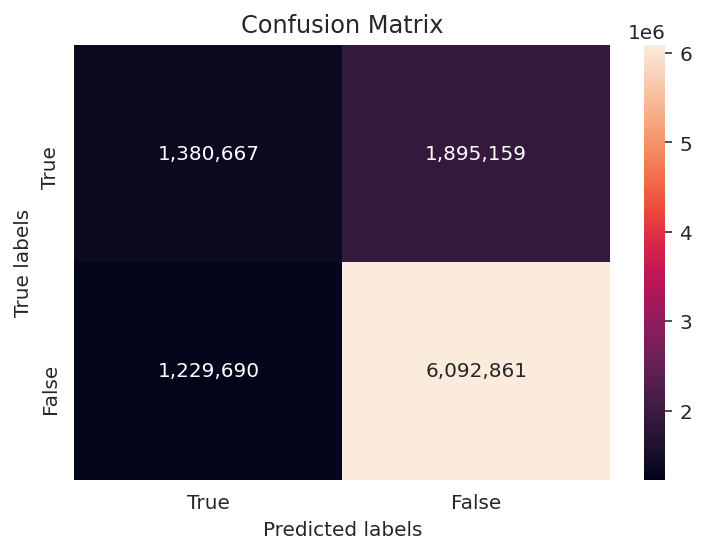

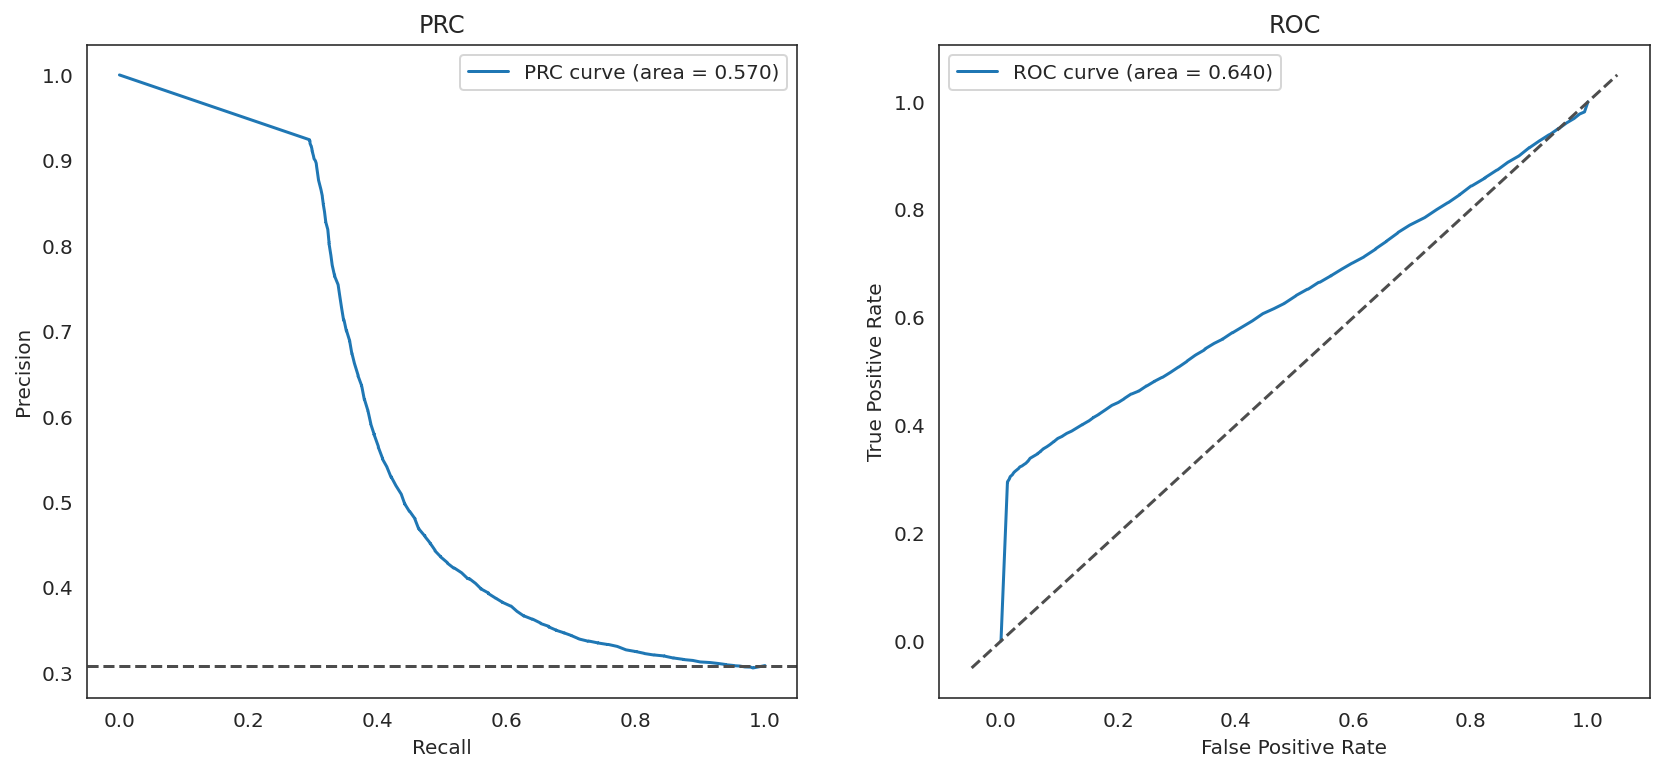

In [34]:
evaluate_classifier(y_test, test_preds, np.array(test_preds_proba)[:,1], METRICS, sample_weights=test_cluster_sizes)

### Positives

In [35]:
heatmap_data_bins = {}

for crit, bins in data_bins.items():
    crit_bins = []
    for binn in bins:
        pos_neg_bin = pos_to_neg_bins[crit].loc[binn.index]
        inner_bins = [binn.loc[pos_neg_bin[pos_neg_bin['Bin'] == thr].index] for thr in BIN_THRESHOLDS]
        crit_bins.append(inner_bins)
    heatmap_data_bins[crit] = crit_bins

In [36]:
from bin.evaluation import get_threshold

TARGET_FPR = 0.3

weighted_threshold = get_threshold(y_test, test_preds_pos_proba, target_fpr=TARGET_FPR, sample_weights=test_cluster_sizes)
nonw_threshold = get_threshold(y_test, test_preds_pos_proba, target_fpr=TARGET_FPR)

In [37]:
crit_pos_preds = {}

for crit, bins in heatmap_data_bins.items():
    print(f'Predicting for data split by {crit}...')
    bin_preds = []
    for inner_bins in bins:
        inner_bins_preds = []
        for inner_bin in inner_bins:
            pos_preds_proba = best_model.predict_proba(inner_bin)[:,pos_class_index]
            
            weighted_preds = pos_preds_proba >= weighted_threshold
            nonweighted_preds = pos_preds_proba >= nonw_threshold
            
            inner_bins_preds.append((nonweighted_preds, weighted_preds))
        bin_preds.append(inner_bins_preds)

    crit_pos_preds[crit] = bin_preds

Predicting for data split by identity...
Predicting for data split by sim...


In [38]:
import numpy as np
from sklearn.metrics import recall_score

rec_vals_by_crit = {}

for crit, bins in crit_pos_preds.items():
    rec_vals = []
    weighted_rec_vals = []
    for inner_bins, inner_bins_data in zip(bins, heatmap_data_bins[crit]):
        inner_rec_vals = []
        weighted_inner_rec_vals = []
        for (nonw_preds, w_preds), data in zip(inner_bins, inner_bins_data):
            y_true = np.ones(len(nonw_preds))
            inner_rec_vals.append(recall_score(y_true, nonw_preds))
            weighted_inner_rec_vals.append(recall_score(y_true, w_preds, sample_weight=test_cluster_sizes.loc[data.index]))

        rec_vals.append(inner_rec_vals)
        weighted_rec_vals.append(weighted_inner_rec_vals)
        
    rec_vals_by_crit[crit] = (rec_vals, weighted_rec_vals)

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

tmp_thresholds = [0] + BIN_THRESHOLDS
PERC_BIN_THRESHOLDS = [
   f'{int(100 * tmp_thresholds[i-1])}-{int(100 * tmp_thresholds[i])}%' for i in range(1,len(tmp_thresholds))
]
    
def bins_performance_heatmap(rec_vals, weighted_rec_vals):
    for title_suffix, rec_vals in [('non-weighted', rec_vals), ('weighted', weighted_rec_vals)]:
        plt.figure()
        ax = sns.heatmap(rec_vals[::-1], annot=True, fmt='.2f',
                         xticklabels=PERC_BIN_THRESHOLDS,
                         yticklabels=PERC_BIN_THRESHOLDS[::-1])
        ax.set(xlabel='POS to NEG', ylabel='POS to POS', title=f'Test recall values ({title_suffix})')
    
    plt.show()

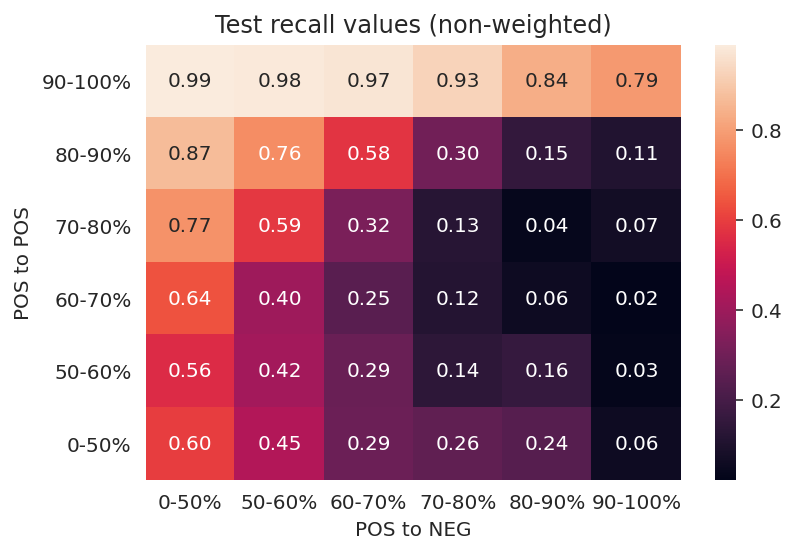

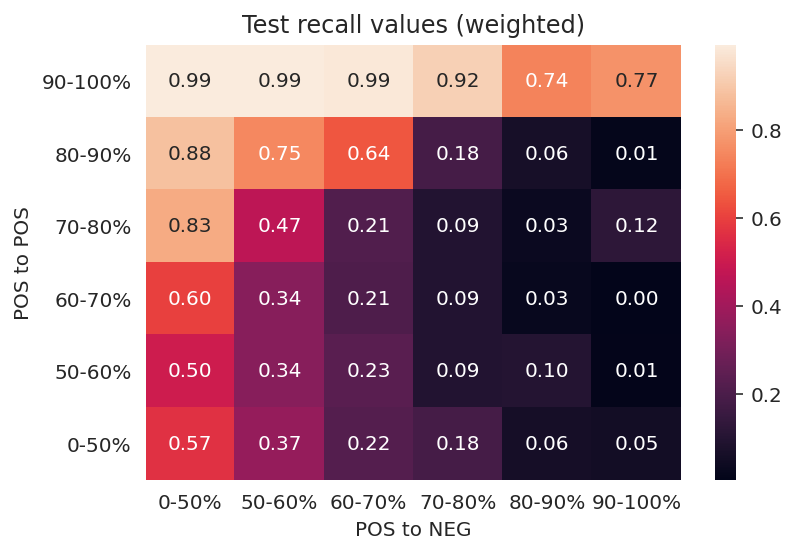

In [40]:
bins_performance_heatmap(*rec_vals_by_crit['identity'])

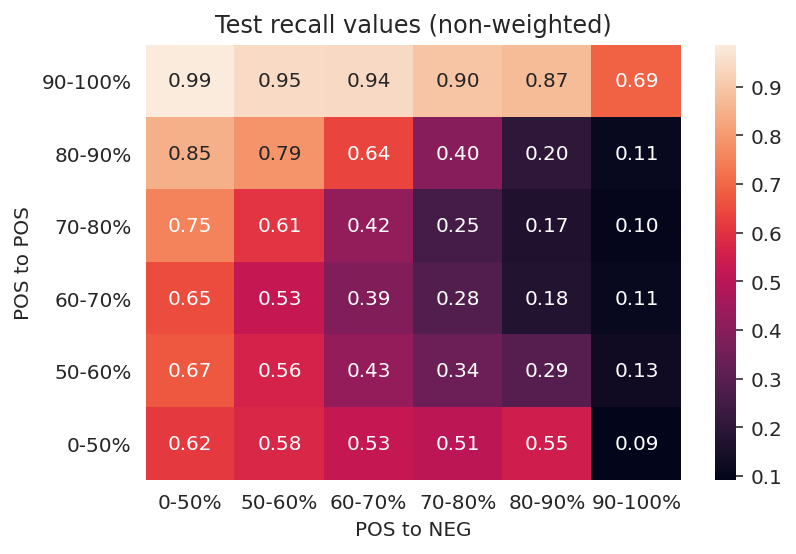

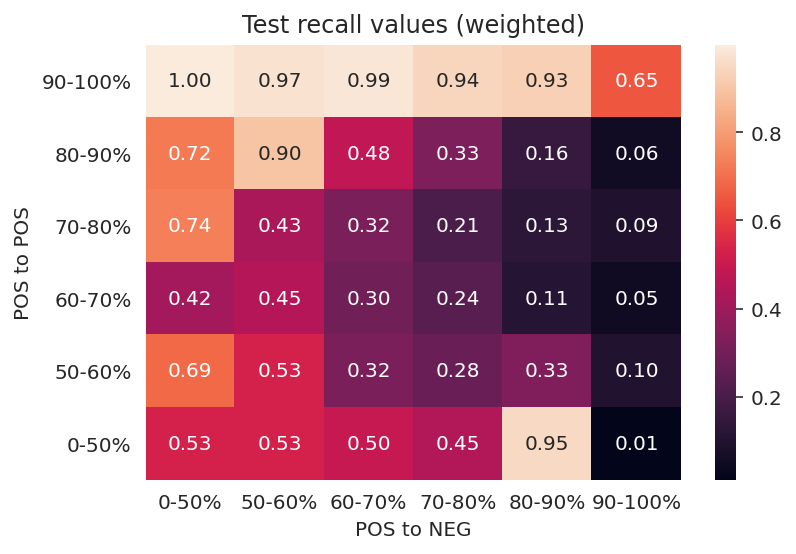

In [41]:
bins_performance_heatmap(*rec_vals_by_crit['sim'])